# 1. EDA - 완료

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../dataset/240128_TripAdvisorHotelReviews/merged.csv')
df.shape

/var/folders/v5/f_7vslxd3bj07chbkmd7nlkh0000gn/T/ipykernel_98794/222469946.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../dataset/240128_TripAdvisorHotelReviews/merged.csv')


(666421, 29)

In [9]:
refined_df = df.drop(columns=df.columns.difference(['text', 'ratings_overall']))

print(refined_df)

                                                     text  ratings_overall
0       Stayed in a king suite for 11 nights and yes i...              5.0
1       On every visit to NYC, the Hotel Beacon is the...              5.0
2       Our first stay on the upper west side and can'...              5.0
3       Great room, very big with huge bed! Great loca...              5.0
4       We go to New York every year and this is where...              5.0
...                                                   ...              ...
666416  If you enjoy being greeted every time you get ...              5.0
666417  This hotel was so beautiful and the people wer...              5.0
666418  What a great hotel. Ive been visiting Washing ...              5.0
666419  Such a lovely old hotel that has been refurbis...              5.0
666420  We couldn't have been happier with our choice ...              5.0

[666421 rows x 2 columns]


<Axes: >

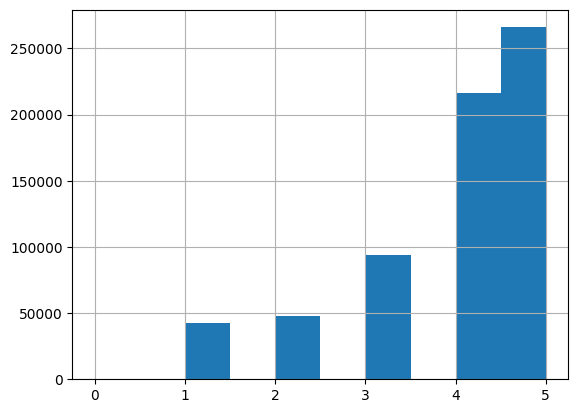

In [10]:
refined_df['ratings_overall'].hist()

In [11]:
# 'ratings_overall' 값을 'low' 또는 'high'로 변환하는 함수 정의
def map_ratings(value):
    if value in [1.0, 2.0, 3.0]:
        return 'low'
    elif value in [4.0, 5.0]:
        return 'high'
    else:
        return 'unknown'  # 다른 값에 대한 처리를 추가할 수도 있습니다.

# 'ratings' 칼럼 생성 및 'ratings_overall' 값에 함수 적용
refined_df['ratings'] = refined_df['ratings_overall'].apply(map_ratings)

# 결과 확인
print(refined_df)

                                                     text  ratings_overall  \
0       Stayed in a king suite for 11 nights and yes i...              5.0   
1       On every visit to NYC, the Hotel Beacon is the...              5.0   
2       Our first stay on the upper west side and can'...              5.0   
3       Great room, very big with huge bed! Great loca...              5.0   
4       We go to New York every year and this is where...              5.0   
...                                                   ...              ...   
666416  If you enjoy being greeted every time you get ...              5.0   
666417  This hotel was so beautiful and the people wer...              5.0   
666418  What a great hotel. Ive been visiting Washing ...              5.0   
666419  Such a lovely old hotel that has been refurbis...              5.0   
666420  We couldn't have been happier with our choice ...              5.0   

       ratings  
0         high  
1         high  
2         hi

# 2. 데이터 전처리

## 2.1 토큰화

In [6]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence

2024-02-03 10:17:49.788228: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
text = df['text'].iloc[0]
print('단어 토큰화3 :',text_to_word_sequence(text))

단어 토큰화3 : ['stayed', 'in', 'a', 'king', 'suite', 'for', '11', 'nights', 'and', 'yes', 'it', 'cots', 'us', 'a', 'bit', 'but', 'we', 'were', 'happy', 'with', 'the', 'standard', 'of', 'room', 'the', 'location', 'and', 'the', 'friendliness', 'of', 'the', 'staff', 'our', 'room', 'was', 'on', 'the', '20th', 'floor', 'overlooking', 'broadway', 'and', 'the', 'madhouse', 'of', 'the', 'fairway', 'market', 'room', 'was', 'quite', 'with', 'no', 'noise', 'evident', 'from', 'the', 'hallway', 'or', 'adjoining', 'rooms', 'it', 'was', 'great', 'to', 'be', 'able', 'to', 'open', 'windows', 'when', 'we', 'craved', 'fresh', 'rather', 'than', 'heated', 'air', 'the', 'beds', 'including', 'the', 'fold', 'out', 'sofa', 'bed', 'were', 'comfortable', 'and', 'the', 'rooms', 'were', 'cleaned', 'well', 'wi', 'fi', 'access', 'worked', 'like', 'a', 'dream', 'with', 'only', 'one', 'connectivity', 'issue', 'on', 'our', 'first', 'night', 'and', 'this', 'was', 'promptly', 'responded', 'to', 'with', 'a', 'call', 'from', '

In [12]:
# 'ratings_overall' 값을 'low' 또는 'high'로 변환하는 함수 정의
def tokenizer(text):
    return text_to_word_sequence(text)

# 'ratings' 칼럼 생성 및 'ratings_overall' 값에 함수 적용
refined_df['tokens'] = refined_df['text'].apply(tokenizer)

# 결과 확인
print(refined_df)

                                                     text  ratings_overall  \
0       Stayed in a king suite for 11 nights and yes i...              5.0   
1       On every visit to NYC, the Hotel Beacon is the...              5.0   
2       Our first stay on the upper west side and can'...              5.0   
3       Great room, very big with huge bed! Great loca...              5.0   
4       We go to New York every year and this is where...              5.0   
...                                                   ...              ...   
666416  If you enjoy being greeted every time you get ...              5.0   
666417  This hotel was so beautiful and the people wer...              5.0   
666418  What a great hotel. Ive been visiting Washing ...              5.0   
666419  Such a lovely old hotel that has been refurbis...              5.0   
666420  We couldn't have been happier with our choice ...              5.0   

       ratings                                             toke

## 2.2 정제 및 정규화

## 2.3 불용어 제거

## 2.4 텍스트 벡터화

## 2.5 패딩 처리

# 3. 데이터 분할

# 4. 모델 선택 및 구성

# 5. 모델 컴파일 및 학습

# 6. 모델 평가

# 7. 하이퍼파라미터 튜닝